In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

# 1. 데이터 불러오기

In [2]:
import os
path = os.getcwd()
file_list = os.listdir('./input')
file_list

['customers.csv',
 'articles.csv',
 'transactions_train.csv',
 'sample_submission.csv']

In [3]:
customers = pd.read_csv(path + '/input/' + 'customers.csv', encoding='UTF-8-sig')
articles = pd.read_csv(path + '/input/' + 'articles.csv', encoding='UTF-8-sig')
transactions_train = pd.read_csv(path + '/input/' + 'transactions_train.csv', encoding='UTF-8-sig')
sample_submission = pd.read_csv(path + '/input/' + 'sample_submission.csv', encoding='UTF-8-sig')

# 2. EDA

#

## 2.1 customers
**특이사항**
- 'FN'과 'Active' 값에서 Null값 약 65%이상 발생

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [5]:
100 * (customers.isna().sum()/customers.shape[0])

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.166854
age                        1.156066
postal_code                0.000000
dtype: float64

<AxesSubplot:>

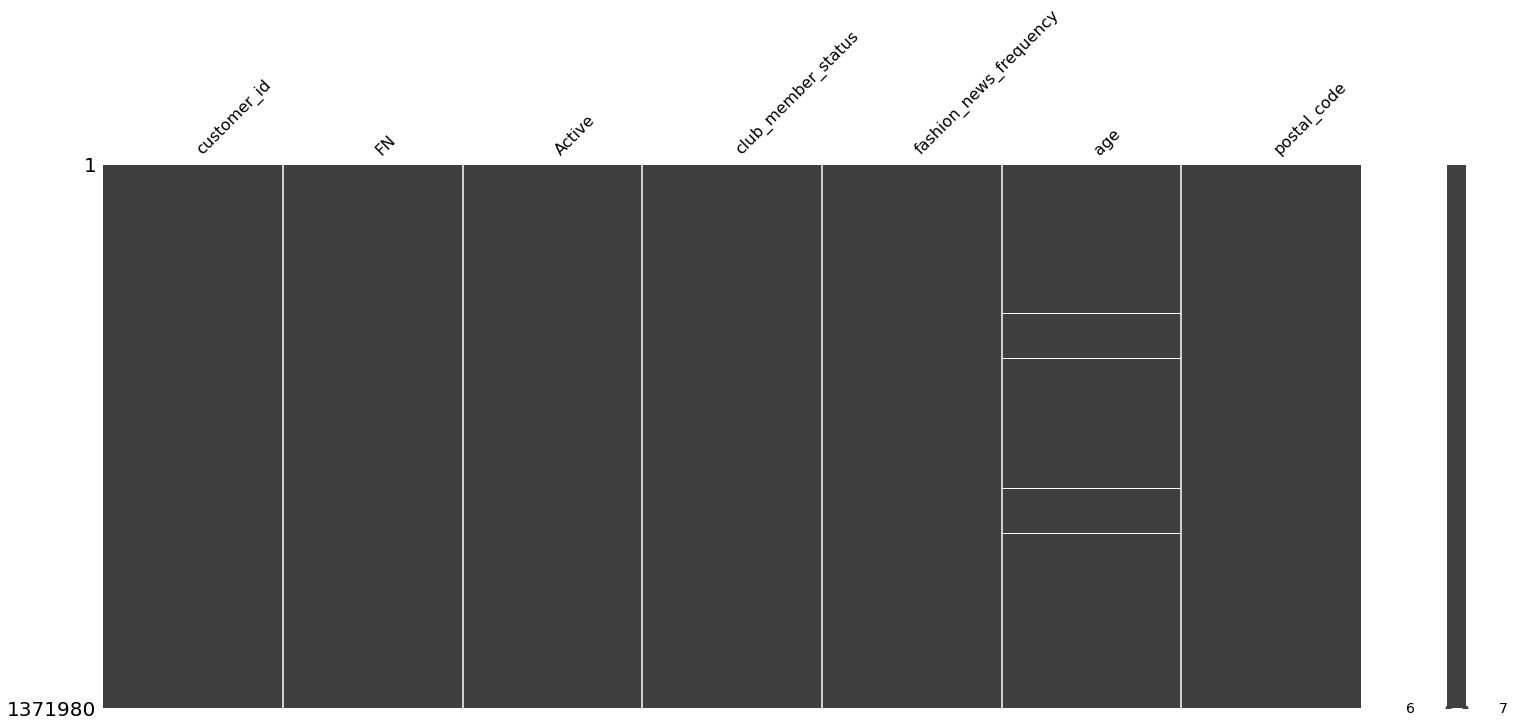

In [29]:
msno.matrix(customers)

### 2.1.1 FN & Active
- 결측값은 0으로 대체

In [8]:
FN_unique = customers['FN'].unique()
cust_unique = customers['Active'].unique()
print('"FN" & "Active" 데이터 탐구')
print('데이터 종류')
print(f'FN : {FN_unique}')
print(f'Active : {cust_unique}')

"FN" & "Active" 데이터 탐구
데이터 종류
FN : [nan  1.]
Active : [nan  1.]


In [9]:
customers['FN'] = customers['FN'].fillna(0)
customers['Active'] = customers['Active'].fillna(0)

### 2.1.2 club_member_status
결측값 = None으로 대체

In [12]:
customers['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [13]:
customers['club_member_status'] = customers['club_member_status'].fillna('None')

### 2.1.3 fashion_news_frequency
결측값 = None으로 대체

In [14]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [15]:
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('None')

### 2.1.4 age
datawig - Deep Neural Networks를 이용한 결측값 제거

출처: https://www.sigmoid.com/blogs/datawig-missing-value-imputation/#:~:text=Datawig%20is%20a%20Deep%20Learning,model%20and%20generate%20the%20predictions.

In [ ]:
customers['age'].unique()

array([49., 25., 24., 54., 52., nan, 20., 32., 29., 31., 56., 75., 41.,
       27., 30., 48., 35., 22., 40., 38., 45., 68., 55., 19., 60., 44.,
       21., 26., 28., 53., 33., 17., 23., 51., 18., 34., 57., 47., 70.,
       50., 63., 58., 43., 67., 72., 42., 39., 79., 71., 59., 36., 62.,
       37., 46., 73., 64., 74., 61., 85., 69., 76., 66., 65., 82., 16.,
       90., 80., 78., 81., 84., 77., 97., 89., 83., 98., 88., 86., 87.,
       93., 91., 99., 96., 94., 92., 95.])

<AxesSubplot:xlabel='age', ylabel='Count'>

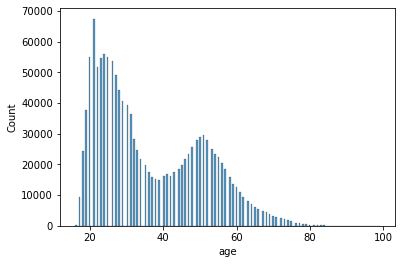

In [27]:
sns.histplot(customers['age'])

In [ ]:
# %pip install datawig

<AxesSubplot:>

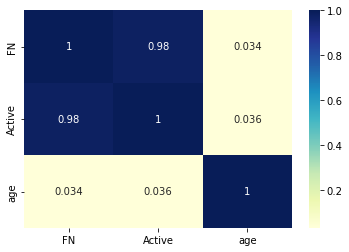

In [41]:
sns.heatmap(customers[['FN', 'Active','club_member_status','fashion_news_frequency','age']].corr(), cmap = 'YlGnBu', annot = True)

/Users/xper100/opt/anaconda3/envs/kagglestudy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fashion_news_frequency', ylabel='count'>

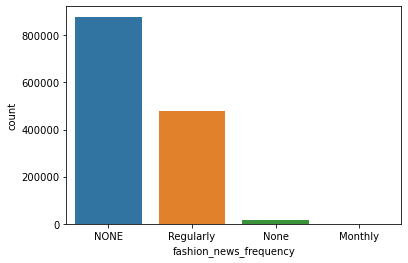

In [46]:
sns.countplot(customers['fashion_news_frequency'])

In [48]:
import datawig

df_train, df_test = datawig.utils.random_split(customers)

# SimpleImputer model 수행
imputer = datawig.SimpleImputer(
    input_columns = ['FN', 'Active'],
    output_column = 'age',
    output_path = 'imputer_model'
)

# Imputer model에 train data로 훈련시키기
imputer.fit(train_df = df_train, num_epochs = 50)

[23:34:01] ../src/executor/graph_executor.cc:1991: Subgraph backend MKLDNN is activated.
2022-06-05 23:34:01,942 [INFO]  
========== start: fit model
2022-06-05 23:34:01,965 [WARNING]  Already bound, ignoring bind()
2022-06-05 23:34:20,877 [INFO]  Epoch[0] Batch [0-30870]	Speed: 26507.87 samples/sec	cross-entropy=16.003459	age-accuracy=0.185158
2022-06-05 23:34:37,809 [INFO]  Epoch[0] Train-cross-entropy=16.000980
2022-06-05 23:34:37,810 [INFO]  Epoch[0] Train-age-accuracy=0.185947
2022-06-05 23:34:37,811 [INFO]  Epoch[0] Time cost=35.791
2022-06-05 23:34:37,820 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2022-06-05 23:34:39,766 [INFO]  Epoch[0] Validation-cross-entropy=16.358176
2022-06-05 23:34:39,768 [INFO]  Epoch[0] Validation-age-accuracy=0.000000
2022-06-05 23:34:56,680 [INFO]  Epoch[1] Batch [0-30870]	Speed: 29209.37 samples/sec	cross-entropy=15.981681	age-accuracy=0.185158
2022-06-05 23:35:13,831 [INFO]  Epoch[1] Train-cross-entropy=16.001635
2022-06-05 23:35:

AttributeError: 'Index' object has no attribute 'contains'

In [56]:

# 결측값 채우기
imputed = imputer.predict(customers[customers['age'].isna()])

AttributeError: 'Index' object has no attribute 'contains'

## 2.2 articles
**특이사항**
- 상품상세정보만 Null값 존재

<AxesSubplot:>

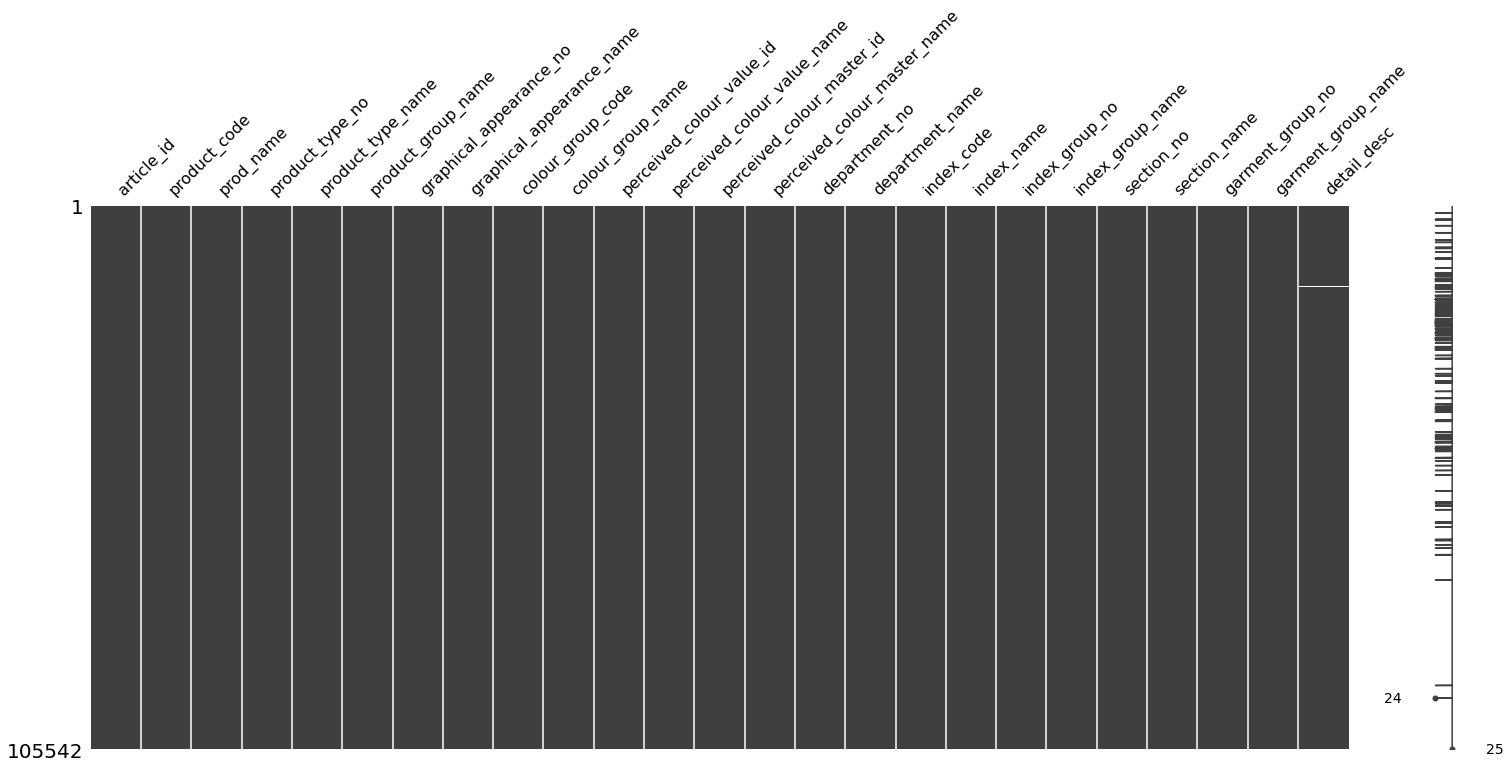

In [31]:
msno.matrix(articles)

In [ ]:
100 * (articles.isna().sum()/articles.shape[0])

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [ ]:
articles.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


## 2.3 transaction

**특이사항**
- Null값 없음

In [ ]:
transactions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
100 * (transactions_train.isna().sum()/transactions_train.shape[0])

t_dat               0.0
customer_id         0.0
article_id          0.0
price               0.0
sales_channel_id    0.0
dtype: float64

<AxesSubplot:>

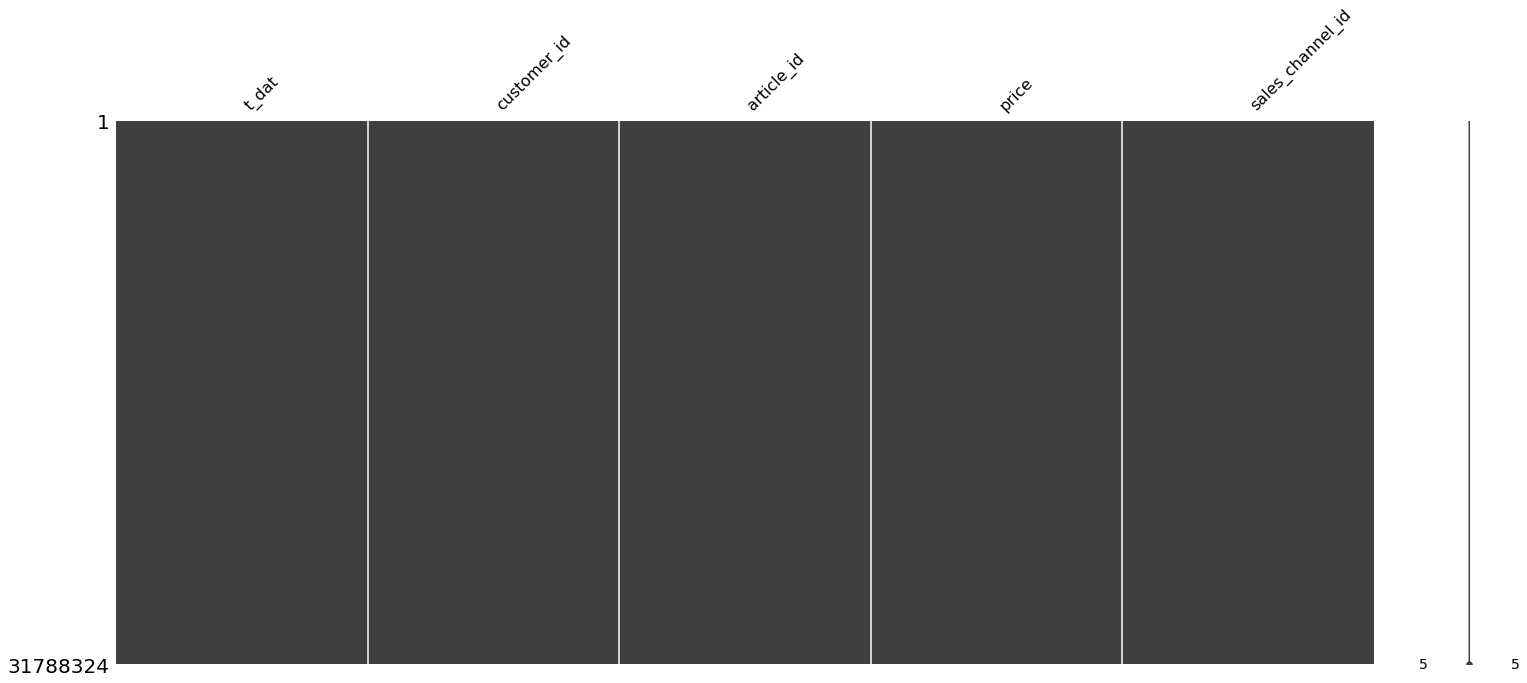

In [32]:
msno.matrix(transactions_train)

In [ ]:
transactions_train.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
